### Creating the dataset for the neural network. 
##### The last ten years of a single watershed will be selected as the input data for training the neural network. 
##### Models were tested on more training data (more years), which resulted in greater computational expense but not more accuracy.

In [1]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Copy the relevant .csv file to local drive. Note! This is a modified version 
!cp /content/drive/MyDrive/HYSETS_savings.csv /content/
     

In [8]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load CSV file
data = pd.read_csv('HYSETS_savings.csv')
data.head()

,watershed,time,watershedID,drainage_area,drainage_area_GSIM,flag_GSIM_boundaries,flag_artificial_boundaries,elevation,slope,discharge,...,Land_Use_Urban_frac,Land_Use_Shrubs_frac,Land_Use_Crops_frac,Land_Use_Snow_Ice_frac,Flag_Land_Use_Extraction,Permeability_logk_m2,Porosity_frac,Flag_Subsoil_Extraction,Hydrometric_station_latitude,Hydrometric_station_longitude
0,0,1950-01-01,855.0,38.42677,NaN,0.0,0.0,1267.3109,2.663227,NaN,...,0.0461,0.0217,0.802,0.0,1,-15.2,0.19,1,49.49232,-113.9265
1,0,1950-01-02,855.0,38.42677,NaN,0.0,0.0,1267.3109,2.663227,NaN,...,0.0461,0.0217,0.802,0.0,1,-15.2,0.19,1,49.49232,-113.9265
2,0,1950-01-03,855.0,38.42677,NaN,0.0,0.0,1267.3109,2.663227,NaN,...,0.0461,0.0217,0.802,0.0,1,-15.2,0.19,1,49.49232,-113.9265
3,0,1950-01-04,855.0,38.42677,NaN,0.0,0.0,1267.3109,2.663227,NaN,...,0.0461,0.0217,0.802,0.0,1,-15.2,0.19,1,49.49232,-113.9265
4,0,1950-01-05,855.0,38.42677,NaN,0.0,0.0,1267.3109,2.663227,NaN,...,0.0461,0.0217,0.802,0.0,1,-15.2,0.19,1,49.49232,-113.9265


In [7]:
# Isolating a single watershed. 
shed205 = data[(data.watershed == 205)]
# Switching the 'time' column to the datetime format.
shed205["time"] = pd.to_datetime(shed205["time"])
     

<ipython-input-7-b97ce0cfddd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shed205["time"] = pd.to_datetime(shed205["time"])


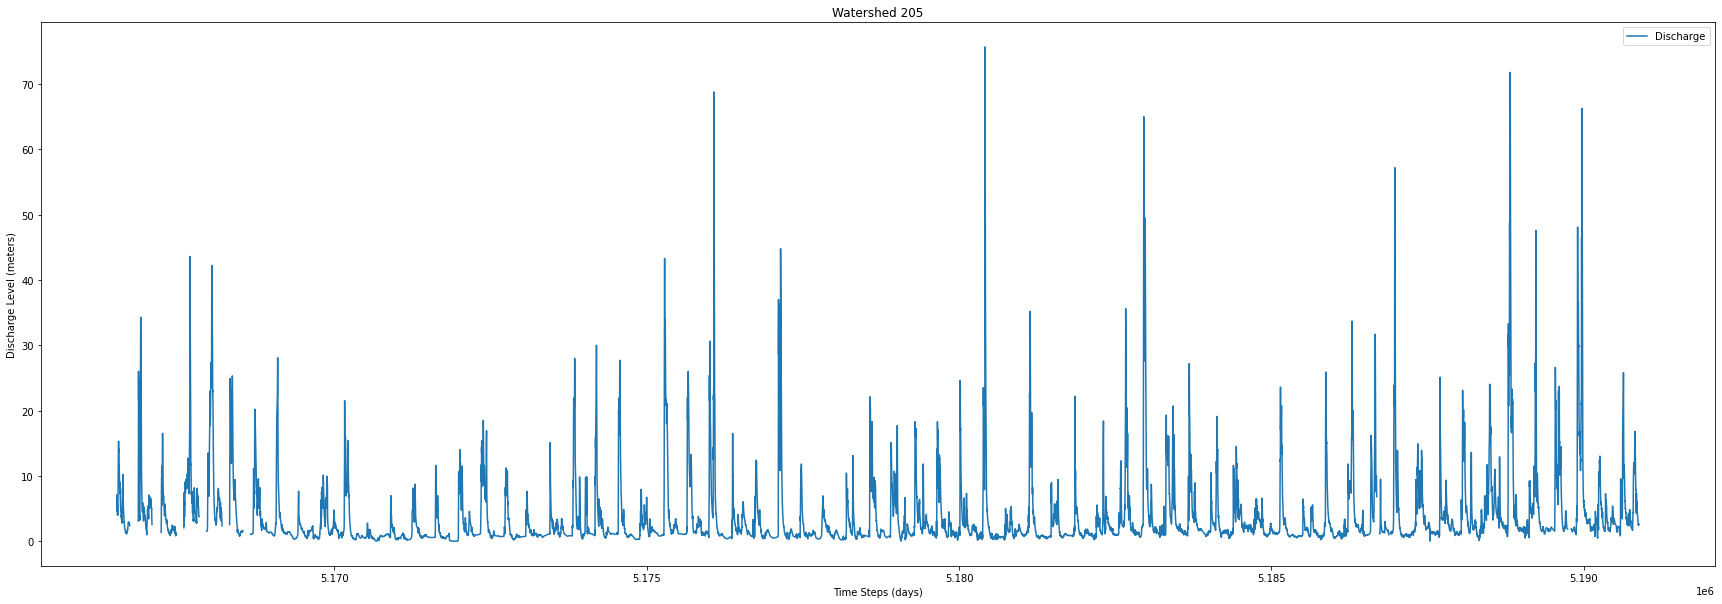

In [9]:
# For visual representation, plotting discharge of watershed 205

x = range(len(shed205))
y1 = shed205.discharge

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.title("Watershed 205")
plt.xlabel("Time Steps (days)") 
plt.ylabel("Discharge Level (meters)")
plt.plot(y1, label = 'Discharge')




plt.legend()
plt.show()

In [10]:
# We will use the last ten years of discharge recordings. 
shed205 = shed205[(shed205.time > '2007-12-31') & (shed205.time < '2017-01-01')]

In [12]:
# Using Pandas built in function 'interpolate', nan values will be filled in. 
shed205.set_index('time', inplace = True)
for watershedID in set(shed205["watershed"]):
  shed205[shed205["watershed"] == watershedID] = shed205[shed205["watershed"] == watershedID].interpolate(method='time', axis=0, limit_direction="both")

In [20]:
# Assuming your original DataFrame is called 'df'
cols_to_keep = ['pr', 'tasmax', 'tasmin', 'discharge']
shed205 = shed205.loc[:, cols_to_keep]
shed205.head()

In [23]:
# Create a .csv file of this watershed. 
shed205.to_csv('watershed_205.csv', index=False)

In [24]:
# Ensuring everything went smoothly. 
checking = pd.read_csv('watershed_205.csv')
checking.head()

,pr,tasmax,tasmin,discharge
0,0.123591,-16.483820,-30.757202,1.30
1,0.245303,-3.820251,-31.308037,1.31
2,0.000000,-0.565344,-11.674008,1.33
3,0.000000,-1.030793,-11.786221,1.28
4,0.000000,0.398956,-10.096242,1.27


In [25]:
# Copy .csv file to Google Drive for use in neural network. 
!cp /content/watershed_205.csv /content/drive/MyDrive/EDAs